In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [14]:
df= pd.read_table('cars.txt')
df.head()

,testcnt,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


LinregressResult(slope=3.9324087591240864, intercept=-17.579094890510937, rvalue=0.8068949006892102, pvalue=1.4898364962951247e-12, stderr=0.41551277665712255)
기울기: 3.9324087591240864
절편: -17.579094890510937
상관계수: 0.8068949006892102
p-value: 1.4898364962951247e-12
표준편차: 0.41551277665712255


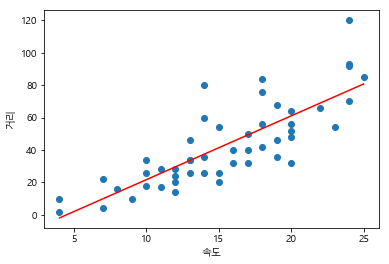

In [21]:
result = stats.linregress(df.speed, df.dist) # 선형회귀분석  독립변수 speed , 종속변수 dist
print(result)
print('기울기:', result.slope)
print('절편:', result.intercept)
print('상관계수:', result.rvalue)
# 속도와 제동거리 연관X(귀무)
# 속도와 제동거리 연관o(대립)
# (검정)p-value 0.1( 0.1= 귀무가설을 채택할 확률이 10% 반대로 대립가설 90 % 선택)
print('p-value:', result.pvalue)
print('표준편차:', result.stderr)
x= df.speed
y= df.dist
ry= polyval([result.slope, result.intercept],x)
# ry =3.93x -17.57
# print(ry)
plt.scatter(x,y)
plt.plot(x,ry,'r-')
plt.xlabel('속도')
plt.ylabel('거리')
plt.show()
sdata = 15
predict = result.slope*sdata+result.intercept

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


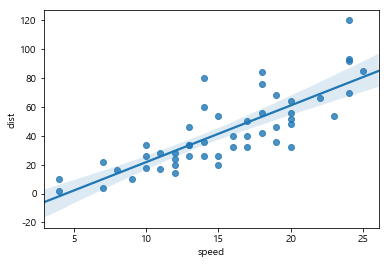

In [29]:
sns.regplot( x='speed',y='dist',data =df)
plt.show()

In [40]:
model = sm.OLS.from_formula('dist~speed',df) #'dist~speed+oil'
result = model.fit()
print(result.summary())
print("=*"*50)
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           1.49e-12
Time:                        11:45:47   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0